<a href="https://colab.research.google.com/github/murpunk/Programming_2023/blob/main/29_05_23_Forest_9_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Список литературы

1. Андреас Мюллер, Сара Гвидо. Введение в машинное обучение с помощью Python. Руководство для специалистов по работе с данными. С. 100—110.


2. Рашка Себастьян, Мирджалили Вахид Python и машинное обучение: машинное и глубокое обучение с использованием Python, scikit-learn и TensorFlow 2, 3-е изд.: Пер. с англ. СПб. : ООО "Диалектика", 2020. С. 135—138.

3. Плас Дж. Вандер Python для сложных задач: наука о данных и машинное обучение. СПб.: Питер, 2018. С. 481—487.

4. Жерон, Орельен. Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow: концепции, инструменты и техники для создания интеллектуальных систем. Пер. с англ. СпБ.: ООО Альфа-книга: 2018. С. 239—250.

5. К.В. Воронцов Математические методы обучения по прецедентам (теория обучения машин). 141 с. (Voron-ML-1.pdf)

6. Машинное обучение (курс лекций, К.В.Воронцов): Многомерная линейная регрессия (курс лекций, К.В.Воронцов)
(machinelearning.ru)
 (лекция К.В. Воронцов “Линейные ансабли”:
https://www.youtube.com/watch?v=-wa43XNJfVI)


7. Крис Элбон Машинное обучение с использованием Python. Сборник рецептов. Пер. с англ. СПб. : БХВ-Петербург, 2019. 384 с.


#I. Прочитать литературу по теме

#II. Сделать задание из файла statement-forest.pdf.

### 1.  Загрузите данные из файла abalone.csv.


 Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [11]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Программирование/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 2.  Преобразуйте признак Sex в числовой

Значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: data[’Sex’] = data[’Sex’].map(lambda x: 1 if x == ’M’ else (-1 if x == ’F’ else 0))



In [6]:
df["Sex"] = df["Sex"].map(lambda x: 1 if x == "M" else (-1 if x == "F" else 0))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 3.  Разделите содержимое файлов на признаки и целевую переменную.


В последнем столбце записана целевая переменная, в остальных — признаки.


In [9]:
X = df.drop("Rings", axis = 1) # признаки
y = df["Rings"] # целевая переменная

### 4.  Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (random_state=1).


Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры
"random_state=1"и "shuffle=True"при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).


In [13]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn import cross_validation # в задании нужно его использовать, но он не работает
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
cross_val = []
k_fold = KFold(shuffle= True, n_splits = 5)
for i in range(1, 51):
    clf = RandomForestRegressor(n_estimators = i, random_state = 1)
    clf.fit(X, y)
    scores = cross_val_score(clf, X, y, cv=k_fold, scoring = "r2").mean() # нужно использовать sklearn.metrics.r2_score, но он не заработал
    cross_val.append(scores)

In [20]:
cross_val

[0.06436619434888165,
 0.28455519023450454,
 0.39528714781312985,
 0.4511758425224809,
 0.4497961613794561,
 0.4626393623680947,
 0.48513318298046093,
 0.480129267060477,
 0.4830509541196026,
 0.5095333595247348,
 0.49860354696383685,
 0.50624562393032,
 0.4914086927382611,
 0.5140364115965219,
 0.5109636924822547,
 0.5204706322924298,
 0.511209503436363,
 0.5102547358151103,
 0.5167485692745988,
 0.5208232472885751,
 0.5170563622920045,
 0.5212721038185404,
 0.5196847748991101,
 0.5209293868815109,
 0.5215788152927537,
 0.5170947322003325,
 0.5248636268125889,
 0.5228600611977214,
 0.5170275506004741,
 0.5267511570626121,
 0.517098024704046,
 0.5201623016925927,
 0.523936676780836,
 0.5327011375418413,
 0.5236628423752808,
 0.5268570686428955,
 0.5308255082778436,
 0.5203788909055037,
 0.5344804389660334,
 0.5350579795210718,
 0.5282315310217441,
 0.5285999321385415,
 0.5254950505033185,
 0.5296529810848438,
 0.538939181046552,
 0.5268118233685446,
 0.5295479104276134,
 0.527261289594

### 5.  Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52.


Это количество и будет ответом на задание.


In [22]:
for i in range(51):
    if cross_val[i] > 0.52:
        print(i + 1)
        break

16


###  6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?


Text(0, 0.5, 'Качество модели')

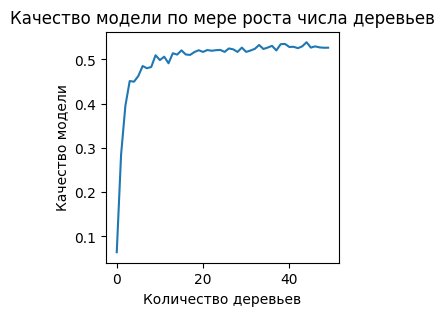

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.plot(cross_val)
plt.title("Качество модели по мере роста числа деревьев")
plt.xlabel("Количество деревьев")
plt.ylabel("Качество модели")